# What is BraTS ? (Source Kaggle)

###Context
BraTS has always been focusing on the evaluation of state-of-the-art methods for the segmentation of brain tumors in multimodal magnetic resonance imaging (MRI) scans. BraTS 2020 utilizes multi-institutional pre-operative MRI scans and primarily focuses on the segmentation (Task 1) of intrinsically heterogeneous (in appearance, shape, and histology) brain tumors, namely gliomas. Furthemore, to pinpoint the clinical relevance of this segmentation task, BraTS’20 also focuses on the prediction of patient overall survival (Task 2), and the distinction between pseudoprogression and true tumor recurrence (Task 3), via integrative analyses of radiomic features and machine learning algorithms. Finally, BraTS'20 intends to evaluate the algorithmic uncertainty in tumor segmentation (Task 4).

### Tasks' Description and Evaluation Framework
In this year's challenge, 4 reference standards are used for the 4 tasks of the challenge:

### Manual segmentation labels of tumor sub-regions,
Clinical data of overall survival,
Clinical evaluation of progression status,
Uncertainty estimation for the predicted tumor sub-regions.
Imaging Data Description
All BraTS multimodal scans are available as NIfTI files (.nii) and describe a) native (T1) and b) post-contrast T1-weighted (T1Gd), c) T2-weighted (T2), and d) T2 Fluid Attenuated Inversion Recovery (T2-FLAIR) volumes, and were acquired with different clinical protocols and various scanners from multiple (n=19) institutions, mentioned as data contributors here.

All the imaging datasets have been segmented manually, by one to four raters, following the same annotation protocol, and their annotations were approved by experienced neuro-radiologists. Annotations comprise the GD-enhancing tumor (ET — label 4), the peritumoral edema (ED — label 2), and the necrotic and non-enhancing tumor core (NCR/NET — label 1), as described both in the BraTS 2012-2013 TMI paper and in the latest BraTS summarizing paper. The provided data are distributed after their pre-processing, i.e., co-registered to the same anatomical template, interpolated to the same resolution (1 mm^3) and skull-stripped.

### Use of Data Beyond BraTS
Participants are allowed to use additional public and/or private data (from their own institutions) for data augmentation, only if they also report results using only the BraTS'20 data and discuss any potential difference in their papers and results. This is due to our intentions to provide a fair comparison among the participating methods.

### Data Usage Agreement / Citations:
You are free to use and/or refer to the BraTS datasets in your own research, provided that you always cite the following three manuscripts:

[1] B. H. Menze, A. Jakab, S. Bauer, J. Kalpathy-Cramer, K. Farahani, J. Kirby, et al. "The Multimodal Brain Tumor Image Segmentation Benchmark (BRATS)", IEEE Transactions on Medical Imaging 34(10), 1993-2024 (2015) DOI: 10.1109/TMI.2014.2377694

[2] S. Bakas, H. Akbari, A. Sotiras, M. Bilello, M. Rozycki, J.S. Kirby, et al., "Advancing The Cancer Genome Atlas glioma MRI collections with expert segmentation labels and radiomic features", Nature Scientific Data, 4:170117 (2017) DOI: 10.1038/sdata.2017.117

[3] S. Bakas, M. Reyes, A. Jakab, S. Bauer, M. Rempfler, A. Crimi, et al., "Identifying the Best Machine Learning Algorithms for Brain Tumor Segmentation, Progression Assessment, and Overall Survival Prediction in the BRATS Challenge", arXiv preprint arXiv:1811.02629 (2018)

In addition, if there are no restrictions imposed from the journal/conference you submit your paper about citing "Data Citations", please be specific and also cite the following:

[4] S. Bakas, H. Akbari, A. Sotiras, M. Bilello, M. Rozycki, J. Kirby, et al., "Segmentation Labels and Radiomic Features for the Pre-operative Scans of the TCGA-GBM collection", The Cancer Imaging Archive, 2017. DOI: 10.7937/K9/TCIA.2017.KLXWJJ1Q

[5] S. Bakas, H. Akbari, A. Sotiras, M. Bilello, M. Rozycki, J. Kirby, et al., "Segmentation Labels and Radiomic Features for the Pre-operative Scans of the TCGA-LGG collection", The Cancer Imaging Archive, 2017. DOI: 10.7937/K9/TCIA.2017.GJQ7R0EF

# Why PyTorch ?

PyTorch is a go to framework that lets us write code in a more pythonic way. Moreover, the kind of dynamism that it supports using naive python code is remarkable.
PyTorch tends to incline more towards Python when compared with any other library. It is because PyTorch is relatively easy to understand and, it feels more natural, native and in line with Python code.
For anyone who has worked with Python, they’ll feel at home with everything with PyTorch, such as loss functions, optimizers, transformations, data loaders and many more classes.

When compared with PyTorch, TensorFlow has a relatively steeper learning curve. Python programmers will need less time adjusting to PyTorch as to them it will most likely feel like an extension of Python’s framework. Easy debugging and a great set of simple APIs play a pivotal role in making PyTorch easier for programmers to pick up.

PyTorch is a godsent for Researchers as it proved to be used by at least 70% of researchers working on frameworks. Despite being the industry-leading choice for developing applications, TensorFlow hasn’t caught up with PyTorch in this aspect, yet. One reason behind this might be the simplicity and ease of use that PyTorch has to offer with better performance.


Unzipping the files

In [ ]:
!unzip -qq /content/drive/MyDrive/BraTS.zip

Clonig into available Unet repo 

In [ ]:
! pip -qq install git+https://github.com/qubvel/segmentation_models.pytorch

     |████████████████████████████████| 61kB 4.1MB/s 
     |████████████████████████████████| 245kB 9.1MB/s 


Importing necessary libraries 

In [ ]:
import segmentation_models_pytorch as smp
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from google.colab import drive
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import time
import albumentations as A
import torch.nn.functional as F
import pandas as pd
import nibabel as nib
from tqdm import tqdm

'pinning' root directory

In [ ]:
root = '/content/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData'
data = pd.read_csv('/content/name_mapping.csv')
data.head(5)

,Grade,BraTS_2017_subject_ID,BraTS_2018_subject_ID,TCGA_TCIA_subject_ID,BraTS_2019_subject_ID,BraTS_2020_subject_ID
0,HGG,Brats17_CBICA_AAB_1,Brats18_CBICA_AAB_1,NaN,BraTS19_CBICA_AAB_1,BraTS20_Training_001
1,HGG,Brats17_CBICA_AAG_1,Brats18_CBICA_AAG_1,NaN,BraTS19_CBICA_AAG_1,BraTS20_Training_002
2,HGG,Brats17_CBICA_AAL_1,Brats18_CBICA_AAL_1,NaN,BraTS19_CBICA_AAL_1,BraTS20_Training_003
3,HGG,Brats17_CBICA_AAP_1,Brats18_CBICA_AAP_1,NaN,BraTS19_CBICA_AAP_1,BraTS20_Training_004
4,HGG,Brats17_CBICA_ABB_1,Brats18_CBICA_ABB_1,NaN,BraTS19_CBICA_ABB_1,BraTS20_Training_005


Exporting csv which might be used for referencing .nii files in regard of their respective paths

In [ ]:
rootlist = []
totlist = []
for filename_root in tqdm(np.sort(os.listdir(root))[:-2]):
    subpath = os.path.join(root, filename_root)
    filelist = []
    for filename in np.sort(os.listdir(subpath)):
        filelist.append(os.path.join(subpath, filename))
    rootlist.append(filename_root)
    totlist.append(filelist)
    
maps = pd.concat([pd.DataFrame(rootlist, columns = ['DIR']), 
                  pd.DataFrame(totlist, columns = ['flair', 'seg', 't1', 't1ce', 't2'])], axis = 1)

maps.to_csv('links.csv', index = False)

100%|██████████| 189/189 [00:00<00:00, 5683.83it/s]


subbing the paths of the root dir into 5 sub dirs paths, according to their categories 

In [ ]:
imgpath = {
              'seg': [],    
              't1': [],
              't1ce': [],
              't2': [],
              'flair': []
          }

for path in data['BraTS_2020_subject_ID']:
    patient = os.path.join(root, path)
    for name in imgpath:
      imgpath[name].append(os.path.join(patient, path + f'_{name}.nii'))
imgpath['seg'][:5]

['/content/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_seg.nii',
 '/content/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_002/BraTS20_Training_002_seg.nii',
 '/content/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_003/BraTS20_Training_003_seg.nii',
 '/content/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_004/BraTS20_Training_004_seg.nii',
 '/content/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_005/BraTS20_Training_005_seg.nii']

In [ ]:
def loadimg(imgpath):
    return nib.load(imgpath).get_fdata()

def ccentre(imgslice, cropx, cropy):
    y, x = imgslice.shape
    startx = x // 2 - (cropx // 2)
    starty = y // 2 - (cropy // 2)    
    return imgslice[starty:starty + cropy, startx:startx + cropx]

'''The first line gets the width and height of the original image. 
Crop dimensions passed in arguments may exceed the original dimension, this results in improper image cropping. 
The last two lines choose the maximum dimension without exceeding the original image dimension. In other words this function crops
the images from the center'''

def normalizer(imgslice):
    return (imgslice - imgslice.mean()) / imgslice.std()

'''Basically I have used StandardScaler for normalization
The standard score of a sample x is calculated as:
z = (x - u) / s
where u is the mean of the training samples or zero if with mean is False, 
and s is the standard deviation of the training samples or one if with std is False.
The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1.
In case of multivariate data, this is done feature-wise (in other words independently for each column of the data).
Given the distribution of the data, each value in the dataset will have the mean value subtracted, 
and then divided by the standard deviation of the whole dataset (or feature in the multivariate case).'''

'Basically I have used StandardScaler for normalization\nThe standard score of a sample x is calculated as:\nz = (x - u) / s\nwhere u is the mean of the training samples or zero if with mean is False, \nand s is the standard deviation of the training samples or one if with std is False.\nThe idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1.\nIn case of multivariate data, this is done feature-wise (in other words independently for each column of the data).\nGiven the distribution of the data, each value in the dataset will have the mean value subtracted, \nand then divided by the standard deviation of the whole dataset (or feature in the multivariate case).'

Making sub dirs according to categories

In [ ]:
! mkdir dataset
! mkdir dataset/t1
! mkdir dataset/t1ce
! mkdir dataset/t2
! mkdir dataset/flair
! mkdir dataset/seg

Saving .npy files for each .nii files and their respective slices

In [ ]:
numOfImgsSaved = 0
imgs = {}
imgslice = {}
TOSAVE = 5000 # Taking only 5000 instances as i am retraining this nb on CPU

for i in (range(len(imgpath['seg']))):
    for name in imgpath:
        imgs[name] = loadimg(imgpath[name][i])
    
    for j in range(155): # as there 155 instances for each .nii file
        for name in imgs:
            imgslice[name] = imgs[name][:, :, j]
            imgslice[name] = ccentre(imgslice[name], 128, 128)
        if imgslice['seg'].max() > 0:
            for name in ['t1','t2','t1ce','flair']:
              imgslice[name] = normalizer(imgslice[name])
            for name in imgslice:
              np.save(f'./dataset/{name}/img_{numOfImgsSaved}.npy', imgslice[name])
            numOfImgsSaved += 1
        
        if numOfImgsSaved == TOSAVE:
          break
    if numOfImgsSaved == TOSAVE:
        break

Some basic Image Visualization

Text(0.5, 1.0, 't2 mask')

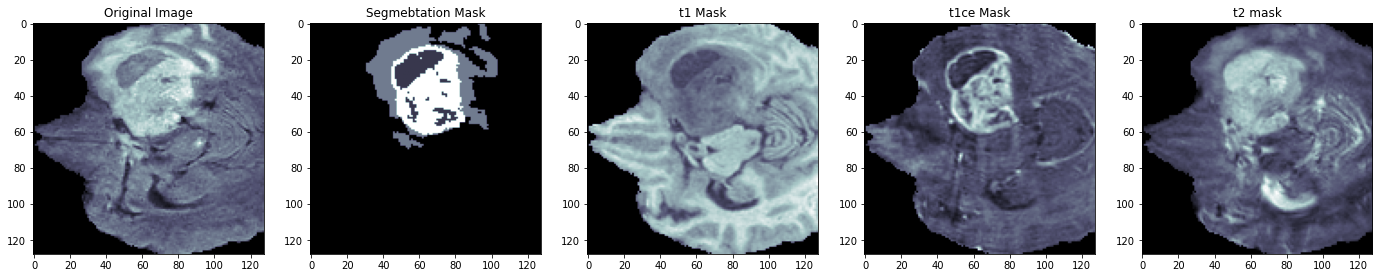

In [ ]:
fig = plt.figure(figsize = (24, 15))
plt.subplot(1, 5, 1)
plt.imshow(np.load('dataset/flair/img_25.npy'), cmap = 'bone')
plt.title('Original Image')

plt.subplot(1, 5, 2)
plt.imshow(np.load('dataset/seg/img_25.npy'), cmap = 'bone')
plt.title('Segmebtation Mask')

plt.subplot(1, 5, 3)
plt.imshow(np.load('dataset/t1/img_25.npy'), cmap = 'bone')
plt.title('t1 Mask')

plt.subplot(1, 5, 4)
plt.imshow(np.load('dataset/t1ce/img_25.npy'), cmap = 'bone')
plt.title('t1ce Mask')

plt.subplot(1, 5, 5)
plt.imshow(np.load('dataset/t2/img_25.npy'), cmap = 'bone')
plt.title('t2 mask')

Image Visualization 2

Text(0.5, 1.0, 't2')

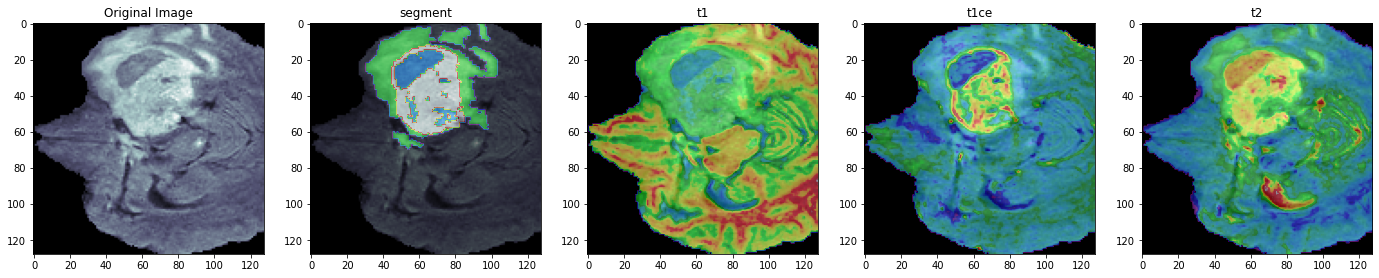

In [ ]:
fig = plt.figure(figsize = (24, 15))
plt.subplot(1, 5, 1)
plt.imshow(np.load('dataset/flair/img_25.npy'), cmap = 'bone')
plt.title('Original Image')

plt.subplot(1, 5, 2)
plt.imshow(np.load('dataset/flair/img_25.npy'), cmap = 'bone')
plt.imshow(np.load('dataset/seg/img_25.npy'), alpha = 0.5, cmap = 'nipy_spectral')
plt.title('segment')

plt.subplot(1, 5, 3)
plt.imshow(np.load('dataset/flair/img_25.npy'), cmap = 'bone')
plt.imshow(np.load('dataset/t1/img_25.npy'), alpha = 0.5, cmap = 'nipy_spectral')
plt.title('t1')

plt.subplot(1, 5, 4)
plt.imshow(np.load('dataset/flair/img_25.npy'), cmap = 'bone')
plt.imshow(np.load('dataset/t1ce/img_25.npy'), alpha = 0.5, cmap = 'nipy_spectral')
plt.title('t1ce')

plt.subplot(1, 5, 5)
plt.imshow(np.load('dataset/flair/img_25.npy'), cmap = 'bone')
plt.imshow(np.load('dataset/t2/img_25.npy'), alpha = 0.5, cmap = 'nipy_spectral')
plt.title('t2')

# Preprocessing Block and building data Generator

In [ ]:
class Dataset(Dataset):
    def __init__(self, datapath = './dataset/', augmentation = None):
        self.augmentation = augmentation
        self.folderpaths = {
                              'mask': os.path.join(datapath, 'seg/'),
                              't1': os.path.join(datapath, 't1/'),
                              't1ce': os.path.join(datapath, 't1ce/'),
                              't2': os.path.join(datapath, 't2/'),
                              'flair': os.path.join(datapath, 'flair/')
                          }
    
    def __getitem__(self, idx):
        images = {}
        for name in self.folderpaths:
            images[name] = np.load(os.path.join(self.folderpaths[name], f'img_{idx}.npy'))

        if self.augmentation:
            images = self.augmentation(
                                        image = images['flair'],
                                        mask = images['mask'],
                                        t1 = images['t1'],
                                        t1ce = images['t1ce'],
                                        t2 = images['t2'] )
            images['flair'] = images['image']

        for name in images:
            images[name] = torch.from_numpy(images[name])

        # stacking multi ins
        input = torch.stack(
                                [images['t1'],
                                images['t1ce'],
                                images['t2'],
                                images['flair']], dim = 0
                            )
        
        images['mask'][images['mask'] == 4] = 3
        # one-hot encoding truth label
        images['mask'] = F.one_hot(images['mask'].long().unsqueeze(0), num_classes = 4).permute(0, 3, 1, 2).contiguous().squeeze(0)
        return input.float(), images['mask'].long()
    
    def __len__(self):
        return len(os.listdir(self.folderpaths['mask'])) - 1

In [ ]:
# Tune-able
augmentation = A.Compose([
    A.OneOf([
                A.ElasticTransform(alpha = 120, sigma = 120 * 0.05, alpha_affine = 120 * 0.03, p = 0.5),
                A.GridDistortion(p = 0.5),
                A.OpticalDistortion(distort_limit = 2, shift_limit = 0.5, p = 0.5)                  
            ], p = 0.8),
    A.RandomBrightnessContrast(p = 0.8)], 
    additional_targets = {'t1':'image', 't1ce':'image', 't2':'image'}
                         )

valid_test_dataset = Dataset(datapath = './dataset/', augmentation = None)
train_dataset = Dataset(datapath = './dataset/', augmentation = augmentation)

# 60%/20%/20% 
train_length=int(0.6 * len(valid_test_dataset))
valid_length = int(0.2 * len(valid_test_dataset))
test_length = len(valid_test_dataset) - train_length - valid_length

_ , valid_dataset, test_dataset = torch.utils.data.random_split(valid_test_dataset, (train_length,valid_length,test_length), generator=torch.Generator().manual_seed(42))
train_dataset, _ , _ = torch.utils.data.random_split(train_dataset, (train_length,valid_length,test_length), generator=torch.Generator().manual_seed(42))

In [ ]:
train_loader = DataLoader(train_dataset,
                      batch_size=16,
                      num_workers=2,
                      shuffle=True)

valid_loader = DataLoader(valid_dataset,
                      batch_size=1,
                      num_workers=2,
                      shuffle=False)

test_loader = DataLoader(test_dataset,
                      batch_size=1,
                      num_workers=2,
                      shuffle=False)

In [ ]:
a, b = next(iter(train_loader))

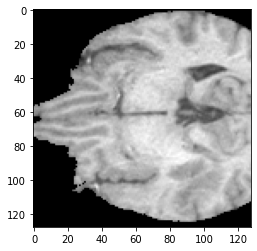

In [ ]:
plt.imshow(a[0, 0],cmap='gray')

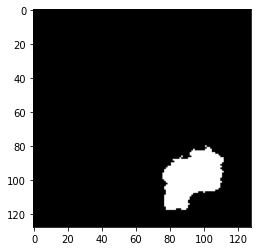

In [ ]:
bb = torch.argmax(b, 0)
plt.imshow(bb[0], cmap='gray')

In [ ]:
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
!nvidia-smi

Fri Mar 26 10:45:57 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P0    28W / 250W |      2MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# What is unet ?

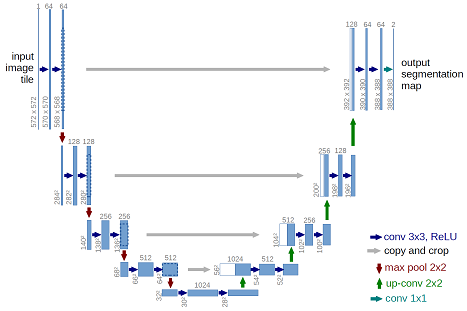

The U-Net architecture stems from the so-called “fully convolutional network” first proposed by Long, Shelhamer, and Darrell.

The main idea is to supplement a usual contracting network by successive layers, where pooling operations are replaced by upsampling operators. Hence these layers increase the resolution of the output. What's more, a successive convolutional layer can then learn to assemble a precise output based on this information.

One important modification in U-Net is that there are a large number of feature channels in the upsampling part, which allow the network to propagate context information to higher resolution layers. As a consequence, the expansive path is more or less symmetric to the contracting part, and yields a u-shaped architecture. The network only uses the valid part of each convolution without any fully connected layers. To predict the pixels in the border region of the image, the missing context is extrapolated by mirroring the input image. This tiling strategy is important to apply the network to large images, since otherwise the resolution would be limited by the GPU memory.

### First, what is Semantic Segmentation ?
In digital image processing and computer vision, image segmentation is the process of partitioning a digital image into multiple segments (sets of pixels, also known as image objects). The goal of segmentation is to simplify and/or change the representation of an image into something that is more meaningful and easier to analyze.Image segmentation is typically used to locate objects and boundaries (lines, curves, etc.) in images. More precisely, image segmentation is the process of assigning a label to every pixel in an image such that pixels with the same label share certain characteristics
Even though researchers have come up with numerous ways to solve this problem, I will talk about a particular architecture namely UNET, which use a Fully Convolutional Network Model for the task.

Model Structure Used

### ResNet ?
ResNet is a Convolutional Neural Network (CNN) architecture, made up of series of residual blocks (ResBlocks) described below with skip connections differentiating ResNets from other CNNs.

### Why ImageNet weights ?


Imagenet is a defacto standard for images classification. A yearly contest is run with millions of training images in 1000 categories. The models used in the imagenet classification competitions are measured against each other for performance. Therefore it provides a "standard" measure for how good a model is for image classification. So many often used transfer learning model models use the imagenet weights.

# Why Dice loss ? Why not Cross Entropy?

One compelling reason for using cross-entropy over dice-coefficient or the similar IoU metric is that the gradients are nicer.

The gradients of cross-entropy wrt the logits is something like p−t, where p is the softmax outputs and t is the target. Meanwhile, if we try to write the dice coefficient in a differentiable form: 2ptp2+t2 or 2ptp+t, then the resulting gradients wrt p are much uglier: 2t(t2−p2)(p2+t2)2 and 2t2(p+t)2. It's easy to imagine a case where both p and t are small, and the gradient blows up to some huge value. In general, it seems likely that training will become more unstable.
In boundary detection tasks, the ground truth boundary pixels and predicted boundary pixels can be viewed as two sets. By leveraging Dice loss, the two sets are trained to overlap little by little. The denominator considers the total number of boundary pixels at global scale, while the numerator considers the overlap between the two sets at local scale. Therefore, Dice loss considers the loss information both locally and globally, which is critical for high accuracy.

# Model Block (CNN architecture)

In [ ]:
from torch import nn
import torch


@torch.jit.script
def autocrop(encoder_layer: torch.Tensor, decoder_layer: torch.Tensor):
    """
    Center-crops the encoder_layer to the size of the decoder_layer,
    so that merging (concatenation) between levels/blocks is possible.
    This is only necessary for input sizes != 2**n for 'same' padding and always required for 'valid' padding.
    """
    if encoder_layer.shape[2:] != decoder_layer.shape[2:]:
        ds = encoder_layer.shape[2:]
        es = decoder_layer.shape[2:]
        assert ds[0] >= es[0]
        assert ds[1] >= es[1]
        if encoder_layer.dim() == 4:  # 2D
            encoder_layer = encoder_layer[
                            :,
                            :,
                            ((ds[0] - es[0]) // 2):((ds[0] + es[0]) // 2),
                            ((ds[1] - es[1]) // 2):((ds[1] + es[1]) // 2)
                            ]
        elif encoder_layer.dim() == 5:  # 3D
            assert ds[2] >= es[2]
            encoder_layer = encoder_layer[
                            :,
                            :,
                            ((ds[0] - es[0]) // 2):((ds[0] + es[0]) // 2),
                            ((ds[1] - es[1]) // 2):((ds[1] + es[1]) // 2),
                            ((ds[2] - es[2]) // 2):((ds[2] + es[2]) // 2),
                            ]
    return encoder_layer, decoder_layer


def conv_layer(dim: int):
    if dim == 3:
        return nn.Conv3d
    elif dim == 2:
        return nn.Conv2d


def get_conv_layer(in_channels: int,
                   out_channels: int,
                   kernel_size: int = 3,
                   stride: int = 1,
                   padding: int = 1,
                   bias: bool = True,
                   dim: int = 2):
    return conv_layer(dim)(in_channels, out_channels, kernel_size=kernel_size, stride=stride, padding=padding,
                           bias=bias)


def conv_transpose_layer(dim: int):
    if dim == 3:
        return nn.ConvTranspose3d
    elif dim == 2:
        return nn.ConvTranspose2d


def get_up_layer(in_channels: int,
                 out_channels: int,
                 kernel_size: int = 2,
                 stride: int = 2,
                 dim: int = 3,
                 up_mode: str = 'transposed',
                 ):
    if up_mode == 'transposed':
        return conv_transpose_layer(dim)(in_channels, out_channels, kernel_size=kernel_size, stride=stride)
    else:
        return nn.Upsample(scale_factor=2.0, mode=up_mode)


def maxpool_layer(dim: int):
    if dim == 3:
        return nn.MaxPool3d
    elif dim == 2:
        return nn.MaxPool2d


def get_maxpool_layer(kernel_size: int = 2,
                      stride: int = 2,
                      padding: int = 0,
                      dim: int = 2):
    return maxpool_layer(dim=dim)(kernel_size=kernel_size, stride=stride, padding=padding)


def get_activation(activation: str):
    if activation == 'relu':
        return nn.ReLU()
    elif activation == 'leaky':
        return nn.LeakyReLU(negative_slope=0.1)
    elif activation == 'elu':
        return nn.ELU()


def get_normalization(normalization: str,
                      num_channels: int,
                      dim: int):
    if normalization == 'batch':
        if dim == 3:
            return nn.BatchNorm3d(num_channels)
        elif dim == 2:
            return nn.BatchNorm2d(num_channels)
    elif normalization == 'instance':
        if dim == 3:
            return nn.InstanceNorm3d(num_channels)
        elif dim == 2:
            return nn.InstanceNorm2d(num_channels)
    elif 'group' in normalization:
        num_groups = int(normalization.partition('group')[-1])  # get the group size from string
        return nn.GroupNorm(num_groups=num_groups, num_channels=num_channels)


class Concatenate(nn.Module):
    def __init__(self):
        super(Concatenate, self).__init__()

    def forward(self, layer_1, layer_2):
        x = torch.cat((layer_1, layer_2), 1)

        return x


class DownBlock(nn.Module):
    """
    A helper Module that performs 2 Convolutions and 1 MaxPool.
    An activation follows each convolution.
    A normalization layer follows each convolution.
    """

    def __init__(self,
                 in_channels: int,
                 out_channels: int,
                 pooling: bool = True,
                 activation: str = 'relu',
                 normalization: str = None,
                 dim: str = 2,
                 conv_mode: str = 'same'):
        super().__init__()

        self.in_channels = in_channels
        self.out_channels = out_channels
        self.pooling = pooling
        self.normalization = normalization
        if conv_mode == 'same':
            self.padding = 1
        elif conv_mode == 'valid':
            self.padding = 0
        self.dim = dim
        self.activation = activation

        # conv layers
        self.conv1 = get_conv_layer(self.in_channels, self.out_channels, kernel_size=3, stride=1, padding=self.padding,
                                    bias=True, dim=self.dim)
        self.conv2 = get_conv_layer(self.out_channels, self.out_channels, kernel_size=3, stride=1, padding=self.padding,
                                    bias=True, dim=self.dim)

        # pooling layer
        if self.pooling:
            self.pool = get_maxpool_layer(kernel_size=2, stride=2, padding=0, dim=self.dim)

        # activation layers
        self.act1 = get_activation(self.activation)
        self.act2 = get_activation(self.activation)

        # normalization layers
        if self.normalization:
            self.norm1 = get_normalization(normalization=self.normalization, num_channels=self.out_channels,
                                           dim=self.dim)
            self.norm2 = get_normalization(normalization=self.normalization, num_channels=self.out_channels,
                                           dim=self.dim)

    def forward(self, x):
        y = self.conv1(x)  # convolution 1
        y = self.act1(y)  # activation 1
        if self.normalization:
            y = self.norm1(y)  # normalization 1
        y = self.conv2(y)  # convolution 2
        y = self.act2(y)  # activation 2
        if self.normalization:
            y = self.norm2(y)  # normalization 2

        before_pooling = y  # save the outputs before the pooling operation
        if self.pooling:
            y = self.pool(y)  # pooling
        return y, before_pooling


class UpBlock(nn.Module):
    """
    A helper Module that performs 2 Convolutions and 1 UpConvolution/Upsample.
    An activation follows each convolution.
    A normalization layer follows each convolution.
    """

    def __init__(self,
                 in_channels: int,
                 out_channels: int,
                 activation: str = 'relu',
                 normalization: str = None,
                 dim: int = 3,
                 conv_mode: str = 'same',
                 up_mode: str = 'transposed'
                 ):
        super().__init__()

        self.in_channels = in_channels
        self.out_channels = out_channels
        self.normalization = normalization
        if conv_mode == 'same':
            self.padding = 1
        elif conv_mode == 'valid':
            self.padding = 0
        self.dim = dim
        self.activation = activation
        self.up_mode = up_mode

        # upconvolution/upsample layer
        self.up = get_up_layer(self.in_channels, self.out_channels, kernel_size=2, stride=2, dim=self.dim,
                               up_mode=self.up_mode)

        # conv layers
        self.conv0 = get_conv_layer(self.in_channels, self.out_channels, kernel_size=1, stride=1, padding=0,
                                    bias=True, dim=self.dim)
        self.conv1 = get_conv_layer(2 * self.out_channels, self.out_channels, kernel_size=3, stride=1,
                                    padding=self.padding,
                                    bias=True, dim=self.dim)
        self.conv2 = get_conv_layer(self.out_channels, self.out_channels, kernel_size=3, stride=1, padding=self.padding,
                                    bias=True, dim=self.dim)

        # activation layers
        self.act0 = get_activation(self.activation)
        self.act1 = get_activation(self.activation)
        self.act2 = get_activation(self.activation)

        # normalization layers
        if self.normalization:
            self.norm0 = get_normalization(normalization=self.normalization, num_channels=self.out_channels,
                                           dim=self.dim)
            self.norm1 = get_normalization(normalization=self.normalization, num_channels=self.out_channels,
                                           dim=self.dim)
            self.norm2 = get_normalization(normalization=self.normalization, num_channels=self.out_channels,
                                           dim=self.dim)

        # concatenate layer
        self.concat = Concatenate()

    def forward(self, encoder_layer, decoder_layer):
        """ Forward pass
        Arguments:
            encoder_layer: Tensor from the encoder pathway
            decoder_layer: Tensor from the decoder pathway (to be up'd)
        """
        up_layer = self.up(decoder_layer)  # up-convolution/up-sampling
        cropped_encoder_layer, dec_layer = autocrop(encoder_layer, up_layer)  # cropping

        if self.up_mode != 'transposed':
            # We need to reduce the channel dimension with a conv layer
            up_layer = self.conv0(up_layer)  # convolution 0
        up_layer = self.act0(up_layer)  # activation 0
        if self.normalization:
            up_layer = self.norm0(up_layer)  # normalization 0

        merged_layer = self.concat(up_layer, cropped_encoder_layer)  # concatenation
        y = self.conv1(merged_layer)  # convolution 1
        y = self.act1(y)  # activation 1
        if self.normalization:
            y = self.norm1(y)  # normalization 1
        y = self.conv2(y)  # convolution 2
        y = self.act2(y)  # acivation 2
        if self.normalization:
            y = self.norm2(y)  # normalization 2
        return y


class UNet(nn.Module):
    def __init__(self,
                 in_channels: int = 1,
                 out_channels: int = 2,
                 n_blocks: int = 4,
                 start_filters: int = 32,
                 activation: str = 'relu',
                 normalization: str = 'batch',
                 conv_mode: str = 'same',
                 dim: int = 2,
                 up_mode: str = 'transposed'
                 ):
        super().__init__()

        self.in_channels = in_channels
        self.out_channels = out_channels
        self.n_blocks = n_blocks
        self.start_filters = start_filters
        self.activation = activation
        self.normalization = normalization
        self.conv_mode = conv_mode
        self.dim = dim
        self.up_mode = up_mode

        self.down_blocks = []
        self.up_blocks = []

        # create encoder path
        for i in range(self.n_blocks):
            num_filters_in = self.in_channels if i == 0 else num_filters_out
            num_filters_out = self.start_filters * (2 ** i)
            pooling = True if i < self.n_blocks - 1 else False

            down_block = DownBlock(in_channels=num_filters_in,
                                   out_channels=num_filters_out,
                                   pooling=pooling,
                                   activation=self.activation,
                                   normalization=self.normalization,
                                   conv_mode=self.conv_mode,
                                   dim=self.dim)

            self.down_blocks.append(down_block)

        # create decoder path (requires only n_blocks-1 blocks)
        for i in range(n_blocks - 1):
            num_filters_in = num_filters_out
            num_filters_out = num_filters_in // 2

            up_block = UpBlock(in_channels=num_filters_in,
                               out_channels=num_filters_out,
                               activation=self.activation,
                               normalization=self.normalization,
                               conv_mode=self.conv_mode,
                               dim=self.dim,
                               up_mode=self.up_mode)

            self.up_blocks.append(up_block)

        # final convolution
        self.conv_final = get_conv_layer(num_filters_out, self.out_channels, kernel_size=1, stride=1, padding=0,
                                         bias=True, dim=self.dim)

        # add the list of modules to current module
        self.down_blocks = nn.ModuleList(self.down_blocks)
        self.up_blocks = nn.ModuleList(self.up_blocks)

        # initialize the weights
        self.initialize_parameters()

    @staticmethod
    def weight_init(module, method, **kwargs):
        if isinstance(module, (nn.Conv3d, nn.Conv2d, nn.ConvTranspose3d, nn.ConvTranspose2d)):
            method(module.weight, **kwargs)  # weights

    @staticmethod
    def bias_init(module, method, **kwargs):
        if isinstance(module, (nn.Conv3d, nn.Conv2d, nn.ConvTranspose3d, nn.ConvTranspose2d)):
            method(module.bias, **kwargs)  # bias

    def initialize_parameters(self,
                              method_weights=nn.init.xavier_uniform_,
                              method_bias=nn.init.zeros_,
                              kwargs_weights={},
                              kwargs_bias={}
                              ):
        for module in self.modules():
            self.weight_init(module, method_weights, **kwargs_weights)  # initialize weights
            self.bias_init(module, method_bias, **kwargs_bias)  # initialize bias

    def forward(self, x: torch.tensor):
        encoder_output = []

        # Encoder pathway
        for module in self.down_blocks:
            x, before_pooling = module(x)
            encoder_output.append(before_pooling)

        # Decoder pathway
        for i, module in enumerate(self.up_blocks):
            before_pool = encoder_output[-(i + 2)]
            x = module(before_pool, x)

        x = self.conv_final(x)

        return x

    def __repr__(self):
        attributes = {attr_key: self.__dict__[attr_key] for attr_key in self.__dict__.keys() if '_' not in attr_key[0] and 'training' not in attr_key}
        d = {self.__class__.__name__: attributes}
        return f'{d}'

In [ ]:
MODEL = UNet(in_channels=4,
             out_channels=4,
             n_blocks=4,
             start_filters=32,
             activation='relu',
             normalization='batch',
             conv_mode='same',
             dim=2)


In [ ]:
backgroundchannel = [0]

DICE_LOSS = smp.utils.losses.DiceLoss(activation = 'softmax2d')  

OPTIMIZER = torch.optim.Adam([ 
                                dict(params=MODEL.parameters(), lr = 0.0001),
                             ])
METRICS = [
              smp.utils.metrics.IoU(threshold = 0.5,ignore_channels = backgroundchannel, activation = 'softmax2d'),
              smp.utils.metrics.Fscore(ignore_channels = backgroundchannel, activation = 'softmax2d'),
          ]

### Metrics used

Intersection over Union (IoU) and F1 score are commonly used evaluation metrics in binary classification, such as for object detection and image segmentation.

Denote the number of true positives by TP, the number of false positives by FP and the number of false negatives by FN. Note that the term for the number of true negatives TN is not present in the expression for either IoU or F1 score, which implies that neither IoU nor F1 is symmetric in the positive and negative class.

In the following we show that IoU and F1 score (both of which can be expressed in terms of TP, FP and FN) can be re-expressed in terms of:

precision (which can be expressed in terms of TP and FP); and
recall (which can be expressed in terms of TP and FN)

# Dice Loss

Popular loss function for image segmentation tasks is based on the Dice coefficient, which is essentially a measure of overlap between two samples. This measure ranges from 0 to 1 where a Dice coefficient of 1 denotes perfect and complete overlap. The Dice coefficient was originally developed for binary data, and can be calculated as:

Dice=2|A∩B||A|+|B|
where |A∩B| represents the common elements between sets A and B, and |A| represents the number of elements in set A (and likewise for set B).

For the case of evaluating a Dice coefficient on predicted segmentation masks, we can approximate |A∩B| as the element-wise multiplication between the prediction and target mask, and then sum the resulting matrix.

# FScore

In statistical analysis of binary classification, the F-score or F-measure is a measure of a test's accuracy. It is calculated from the precision and recall of the test, where the precision is the number of correctly identified positive results divided by the number of all positive results, including those not identified correctly, and the recall is the number of correctly identified positive results divided by the number of all samples that should have been identified as positive. Precision is also known as positive predictive value, and recall is also known as sensitivity in diagnostic binary classification.

The F1 score is the harmonic mean of the precision and recall. The more generic score applies additional weights, valuing one of precision or recall more than the other.

The highest possible value of an F-score is 1.0, indicating perfect precision and recall, and the lowest possible value is 0, if either the precision or the recall is zero. The F1 score is also known as the Sørensen–Dice coefficient or Dice similarity coefficient (DSC)

# IoU score

The Intersection over Union (IoU) metric, also referred to as the Jaccard index, is essentially a method to quantify the percent overlap between the target mask and our prediction output. This metric is closely related to the Dice coefficient which is often used as a loss function during training.

Quite simply, the IoU metric measures the number of pixels common between the target and prediction masks divided by the total number of pixels present across both masks.

IoU=target∩predictiontarget∪prediction
As a visual example, let's suppose we're tasked with calculating the IoU score of the following prediction, given the ground truth labeled mask.

The intersection (A∩B) is comprised of the pixels found in both the prediction mask and the ground truth mask, whereas the union (A∪B) is simply comprised of all pixels found in either the prediction or target mask.

In [ ]:
train_epoch = smp.utils.train.TrainEpoch(
                                            model = MODEL,
                                            loss = DICE_LOSS,
                                            metrics = [],
                                            optimizer = OPTIMIZER,
                                            device = DEVICE,
                                            verbose = True
                                        )
valid_epoch = smp.utils.train.ValidEpoch(
                                            model = MODEL,
                                            loss = DICE_LOSS,
                                            metrics = METRICS,
                                            device = DEVICE,
                                            verbose = True
                                        )

max_dice_score = 0
stats = {
          'train_loss' : [],
          'valid_loss' : [],
          'fscore' : [],
          'iou_score' : []
        }

for i in range(50):
  print(f'\n --- Epoch {i} --- ')
  train_logs = train_epoch.run(train_loader)
  valid_logs = valid_epoch.run(valid_loader)
  
  if max_dice_score < valid_logs['fscore']:
      max_dice_score = valid_logs['fscore']
      torch.save(MODEL.state_dict(), f'./model.pth')
      print('model saved!')
  
  # loss statistics
  stats['train_loss'].append(train_logs['dice_loss'])
  stats['valid_loss'].append(valid_logs['dice_loss'])

  # metric statistics
  stats['fscore'].append(valid_logs['fscore'])
  stats['iou_score'].append(valid_logs['iou_score'])
  np.save(f'./model.npy', stats)
  


 --- Epoch 0 --- 
valid: 100%|██████████| 999/999 [00:16<00:00, 61.36it/s, dice_loss - 0.1207, iou_score - 0.3499, fscore - 0.4836]
model saved!

 --- Epoch 1 --- 
valid: 100%|██████████| 999/999 [00:16<00:00, 61.86it/s, dice_loss - 0.08571, iou_score - 0.4087, fscore - 0.543]
model saved!

 --- Epoch 2 --- 
valid: 100%|██████████| 999/999 [00:15<00:00, 62.47it/s, dice_loss - 0.07272, iou_score - 0.4244, fscore - 0.5559]
model saved!

 --- Epoch 3 --- 
valid: 100%|██████████| 999/999 [00:16<00:00, 61.48it/s, dice_loss - 0.05578, iou_score - 0.4408, fscore - 0.5597]
model saved!

 --- Epoch 4 --- 
valid: 100%|██████████| 999/999 [00:16<00:00, 61.00it/s, dice_loss - 0.05201, iou_score - 0.4634, fscore - 0.5911]
model saved!

 --- Epoch 5 --- 
valid: 100%|██████████| 999/999 [00:16<00:00, 62.14it/s, dice_loss - 0.04669, iou_score - 0.4679, fscore - 0.5897]

 --- Epoch 6 --- 
valid: 100%|██████████| 999/999 [00:16<00:00, 60.41it/s, dice_loss - 0.0404, iou_score - 0.4756, fscore - 0.5958]


Text(0.5, 1.0, 'Train and Validation Loss')

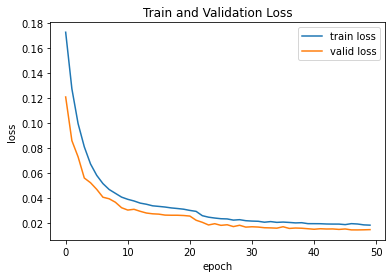

In [ ]:
STATS = np.load(f'./model.npy', allow_pickle = 'TRUE').item()
plt.plot(STATS['train_loss'], label = 'train loss')
plt.plot(STATS['valid_loss'], label = 'valid loss')
plt.legend(loc = 'upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Train and Validation Loss')

Text(0.5, 1.0, 'Fscore')

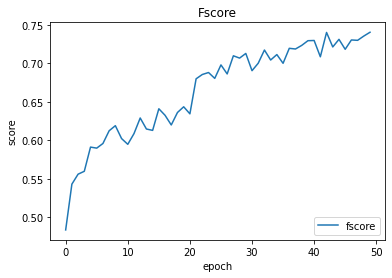

In [ ]:
STATS = np.load(f'./model.npy', allow_pickle = 'TRUE').item()
plt.plot(STATS['fscore'], label = 'fscore')
plt.legend(loc = "lower right")
plt.ylabel('score')
plt.xlabel('epoch')
plt.title('Fscore')

### We achieved a Validation Score of 
dice_loss - 0.009851, iou_score - 0.7358, fscore - 0.8207

In [ ]:
MODEL.load_state_dict(torch.load('./model.pth'))

<All keys matched successfully>

In [ ]:
with torch.no_grad():
    out = MODEL(a.cuda())

Text(0.5, 1.0, 'Prediction')

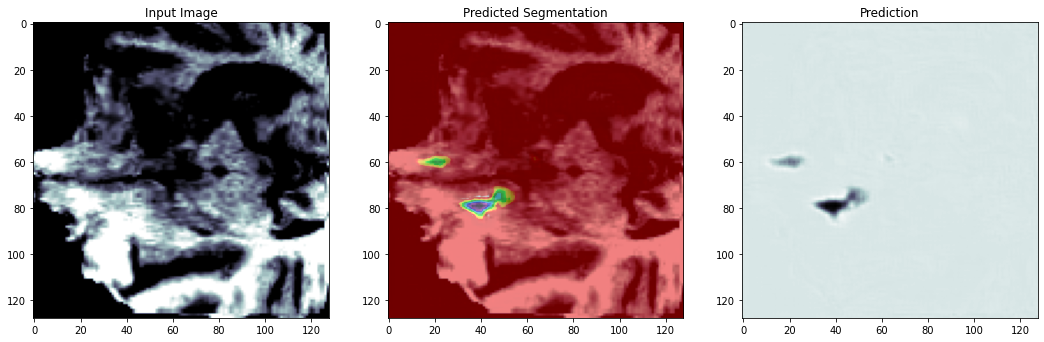

In [ ]:
plt.figure(figsize = (18, 10))
plt.subplot(1, 3, 1)
plt.imshow(a[2, 0],cmap='bone')
plt.title('Input Image')
plt.subplot(1, 3, 2)
plt.imshow(a[2, 0],cmap='bone')
plt.imshow(out.cpu()[2, 0], alpha = 0.5, cmap = 'nipy_spectral')
plt.title('Predicted Segmentation')
plt.subplot(1, 3, 3)
plt.imshow(out.cpu()[2, 0], cmap = 'bone')
plt.title('Prediction')

# Comparison

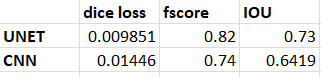

In [ ]:
# The comparison is made above